<a href="https://colab.research.google.com/github/chiragbilimoria/Machine-Learning-Model/blob/master/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Importing Dataset 
df=pd.read_csv('DSA Data Set.csv')

**Data Exploration**


In [ ]:
df.shape

(41188, 22)

In [ ]:
#overview of data
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes


In [ ]:
#Looking after data types of columns in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [ ]:
#checking Null values in dataset
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [ ]:
df['y_num']=df['y'].replace({'no': 0, 'yes': 1})

In [ ]:
#replacing 999 with 0 since pdays=999 means client was not previosuly contacted
df["pdays"].replace({999: 0}, inplace=True)

In [ ]:
''' Looking at summary statistics and frequecy count for all the columns '''
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,y_num
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN,36548,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,0.221229,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597,NaN,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,1.348874,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351,NaN,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174,NaN,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,0.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484,NaN,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,0.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879,NaN,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,0.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214,NaN,0.000000


Looking for summary statistics of dataset
One interesting thing to look for is the model prediction variable where its means value is 0.88% 
which tells us that most of the value it predicter for Y was Yes 
while the Y varible has 88% of data as No which tells us that this data set is baised and most of them did not subscribe to a term deposit

In [ ]:
#Taking count of Yes and No for target variable. Here we see lot of customer(88%) response was No to new subscription
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
#taking mean of all the continous variable wrt Y
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y_num
y,,,,,,,,,,,,
no,39.911185,220.844807,2.633085,0.092864,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.906841,0.0
yes,40.913147,553.191164,2.051724,1.232328,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.736021,1.0


Here if we take the mean for all the continous variable and group by our output variable we see the following
Age of person who subscribed the services were of high age
Duration of the call where response was Yes is very much high(more than double) when compared with duration for No
pdays is also low hence client would have remember about the previous services and hence said yes to the new service
Pervious value is also high for Y which means thta customer remebered about the past interaction and may be this is the reson for yes
Also the campaign value is little less for yes and on an average we get to know with in 2 call if ans is yes or no

In [ ]:
# Getting counts of various types of jobs contacted customer have
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

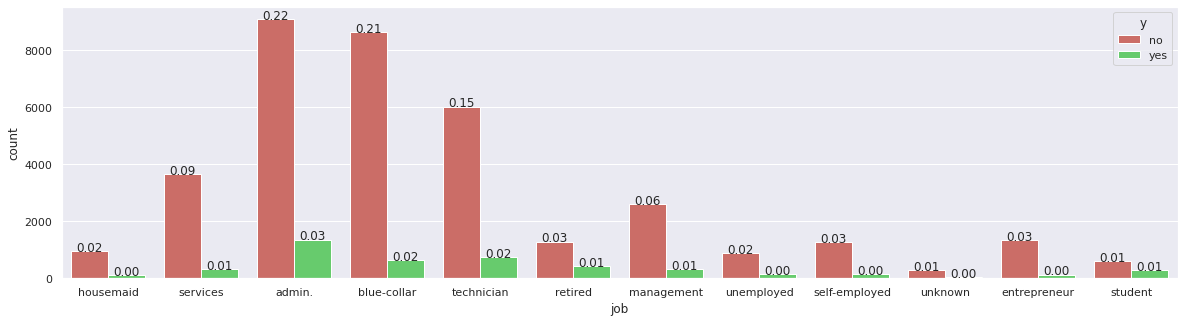

In [ ]:
'''Plotting job type with Y value to get % of job type that either said Yes to a term deposit or No'''
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="job", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Students and retired person more likely to subcribe to  a term deposit and hence in next campiagn they should be targeted more

In [ ]:
'''Performing cross tab to get count of yes and no based on different job type'''
pd.crosstab(index=df['job'],columns=df['y'],margins=True,normalize=False)
job_ct=pd.crosstab(index=df['job'],columns=df['y'])
print(job_ct)

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


In [ ]:
'''Calculating chi square value to see if there is any association between job type and Y'''
chi2res=chi2_contingency(job_ct)

In [ ]:
chi2res[:3]

(961.2424403289555, 4.189763287563623e-199, 11)

Here 961.24 is the chi square value and 4.189763287563623e-199 is p-value which is close to 0 and hence there is correlation between job and Y


In [ ]:
# Calculating Cramer's V test to find strength of association between Job and Y
np.sqrt(chi2res[0]/df.shape[0])

0.15276755102517953

Here we see that cramer's v test value is 0.15 which says that there is association but not a strong one between job and Y

In [ ]:
# Calculating means of all the continuous variable wrt to different job types
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y_num
job,,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,0.275187,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.871067,0.129726
blue-collar,39.555760,264.542360,2.558461,0.086341,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.926932,0.068943
entrepreneur,41.723214,263.267857,2.535714,0.106456,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.908061,0.085165
housemaid,45.500000,250.454717,2.639623,0.219811,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.897923,0.100000
management,42.362859,257.058140,2.476060,0.204172,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.882444,0.112175
retired,62.027326,273.712209,2.476744,0.578488,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.771417,0.252326
self-employed,39.949331,264.142153,2.660802,0.118227,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.892991,0.104856
services,37.926430,258.398085,2.587805,0.103301,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.913795,0.081381
student,25.894857,283.683429,2.104000,1.057143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.733393,0.314286


In [ ]:
# Getting counts for various values in marital columns
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

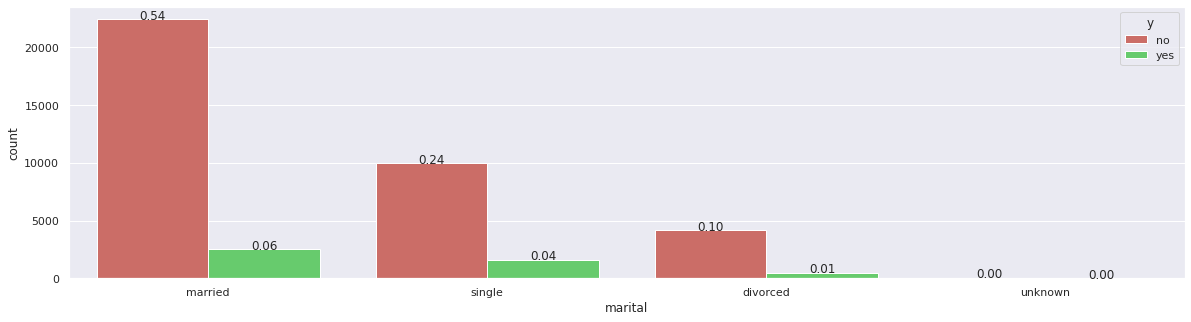

In [ ]:
# Plotting marital type with Y value to get % of different marital status that either said Yes or No to a term deposit 
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="marital", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here the value of yes is very less in all the categories and hence marital status should have low association with y

In [ ]:
#Performing cross tab to get count of yes and no based on different marital status
pd.crosstab(index=df['marital'],columns=df['y'],margins=True,normalize=False)
marital_ct=pd.crosstab(index=df['marital'],columns=df['y'])
print(marital_ct)

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


In [ ]:
#Calculating chi square value to see if there is any association between marital status and Y
marital_chi2=chi2_contingency(marital_ct)

In [ ]:
marital_chi2[:3]

(122.65515182252989, 2.068014648442211e-26, 3)

Here the chi_square value 122.655 is not very high but we dont p value which is less than 0.05 and hence we can tell that there is association between marital status and y


In [ ]:
# calculating cramer's v test to find strength of aasociation between marital status and Y
np.sqrt(marital_chi2[0]/df.shape[0])

0.05457045126504373

Here the value is very low and hence there is no strong association between marital status and y

In [ ]:
# calculating counts of various education level
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

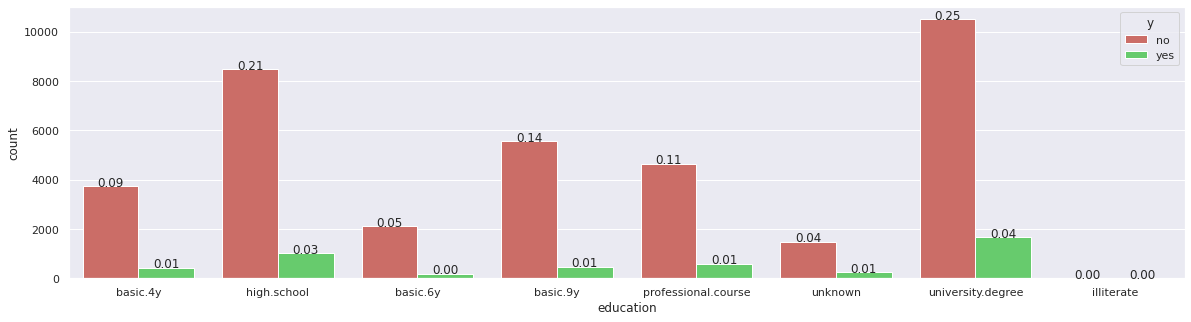

In [ ]:
# Plotting education level attained  with Y value to get % of different education level that either said Yes or No to a term deposit  
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="education", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

University degree and high school level have high number to yes in Y

In [ ]:
#Performing cross tab to get count of yes and no based on different education level
pd.crosstab(index=df['education'],columns=df['y'],margins=True,normalize=False)
education_ct=pd.crosstab(index=df['education'],columns=df['y'])

In [ ]:
#Calculating chi square value to see if there is any association between education and Y
education_chi2=chi2_contingency(education_ct)

In [ ]:
education_chi2[:3]

(193.10590454149565, 3.3051890144025054e-38, 7)

Here the value of chi square is not that high but p value is less than 0.05 and hence we can say that Y and education have association

In [ ]:
# calculating cramer's v test to find strength of aasociation between education and Y
np.sqrt(education_chi2[0]/df.shape[0])

0.06847190717366518

Here the strength of relationship is very low

In [ ]:
# Getting count of default values
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


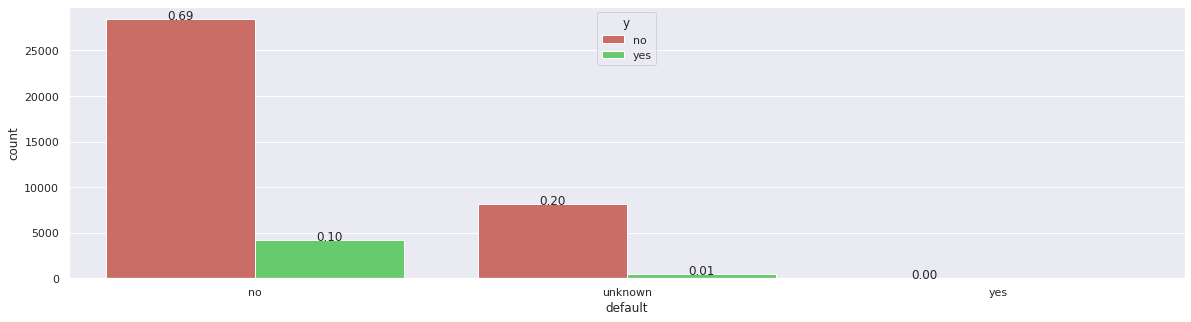

In [ ]:
# plotting how various default values performed with Y 
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="default", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here from above graph more people with no credit default have said yes to product

In [ ]:
#Performing cross tab to get count of yes and no based on different default values
pd.crosstab(index=df['default'],columns=df['y'],margins=True,normalize=False)
default_ct=pd.crosstab(index=df['default'],columns=df['y'])

In [ ]:
# calculating chi square value
default_chi2=chi2_contingency(default_ct)

In [ ]:
default_chi2[:3]

(406.5775146420093, 5.1619579513916376e-89, 2)

Here the chi square value is little higher that previous variables and p value is also less than 0.05

In [ ]:
# calculating cramer's v test to find strength of aasociation between default and Y
np.sqrt(default_chi2[0]/df.shape[0])

0.09935422186499668

Here again the strenght is not that high

In [ ]:
# Getting counts for housing values 
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

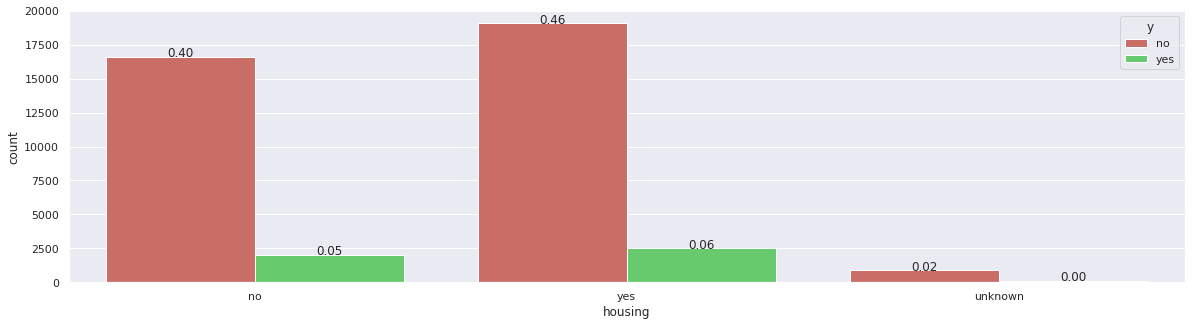

In [ ]:
#plotting graph to show how different values performed with Y
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="housing", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here type of housing does not tell much as both yes and on of housing values are almost same for yes

In [ ]:
#Performing cross tab to get count of yes and no based on different housing values
pd.crosstab(index=df['housing'],columns=df['y'],margins=True,normalize=False)
housing_ct=pd.crosstab(index=df['housing'],columns=df['y'])


In [ ]:
# calculating chi square value for housing
housing_chi2=chi2_contingency(housing_ct)

In [ ]:
housing_chi2[:3]

(5.684495858974168, 0.05829447669453452, 2)

Here the chi square value is very low and p value is greater than 0.05 and hence there is no association between Y and housing

In [ ]:
# Getting value count for loan column
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

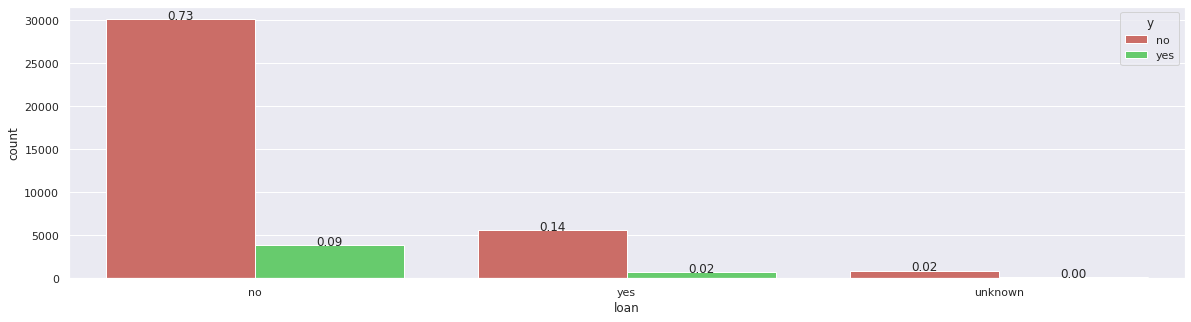

In [ ]:
# plotting value with Y 
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="loan", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here peole with no loan as more likely to subcribe to a term deposit

In [ ]:
# calcuating cross tab values
pd.crosstab(index=df['loan'],columns=df['y'],margins=True,normalize=False)
loan_ct=pd.crosstab(index=df['loan'],columns=df['y'])

In [ ]:
# calculating chi square value for loan
loan_chi2=chi2_contingency(loan_ct)

In [ ]:
loan_chi2[:3]

(1.094027551150338, 0.5786752870441754, 2)

Here the chi square value is very low and p value is greater than 0.05 and hence there is no association between loan and Y

In [ ]:
# cramer's v test value
np.sqrt(loan_chi2[0]/df.shape[0])

0.0051538144342840216

In [ ]:
# geeting counts of different contact types
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

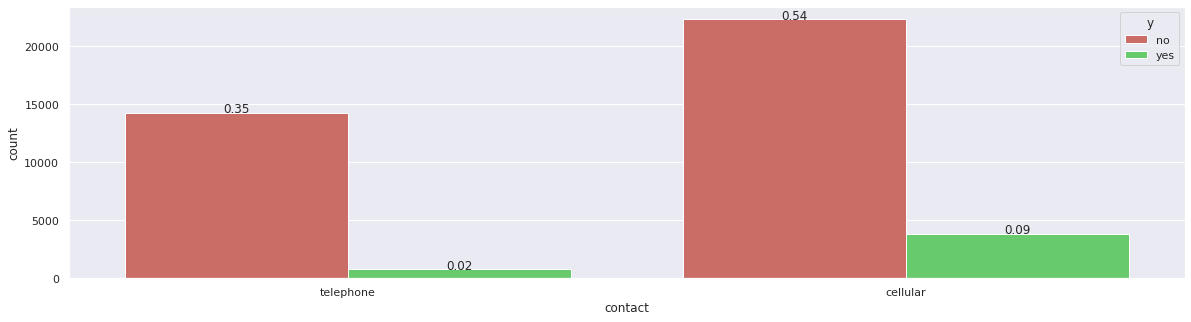

In [ ]:
# plotting different contact type with Y
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="contact", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here people who have cellular contact information need to be contact more for future campaign 

In [ ]:
# calculating croos tab values
pd.crosstab(index=df['contact'],columns=df['y'],margins=True,normalize=False)
contact_ct=pd.crosstab(index=df['contact'],columns=df['y'])

In [ ]:
# calculating chi square values
contact_chi2=chi2_contingency(contact_ct)

In [ ]:
contact_chi2[:3]

(862.3183642075705, 1.5259856523129964e-189, 1)

Here the chi square value is high and p value less than 0.05 have we have association between  contact and Y

In [ ]:
# calculating cramer's v test
np.sqrt(contact_chi2[0]/df.shape[0])

0.14469331461054977

The value of the test is higher compared to marital, Education,default

In [ ]:
# calculating count of different values in month
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

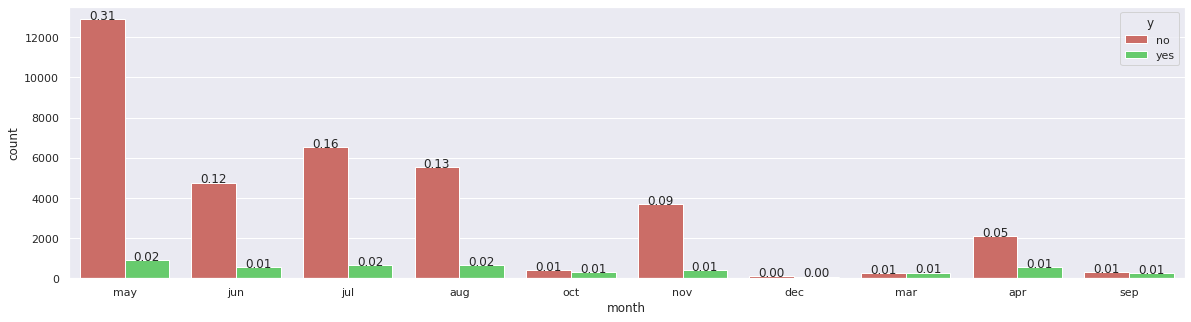

In [ ]:
#plotting how different month perferomed wrt Y
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="month", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here seeing the graph customers were not contacted in month of dec, jan, feb and in month of march,oct and sept contact was made very less and most focused was on month of may.Hence for next campaign proper call should be made in different months

In [ ]:
# calculating cross tab value
pd.crosstab(index=df['month'],columns=df['y'],margins=True,normalize=False)
month_ct=pd.crosstab(index=df['month'],columns=df['y'])

In [ ]:
# calculating chi square value
month_chi2=chi2_contingency(month_ct)

In [ ]:
month_chi2[:3]

(3101.149351411678, 0.0, 9)

Here the value of chi square is high and p value is 0 and hence we can say that month ahs a strong association with Y

In [ ]:
# calculating cramer's v test 
np.sqrt(month_chi2[0]/df.shape[0])

0.2743948709306683

The value of cramer's v test is highest among all the variable till now and hence month plays an important role in deciding y value

In [ ]:
# geeting count of different days 
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

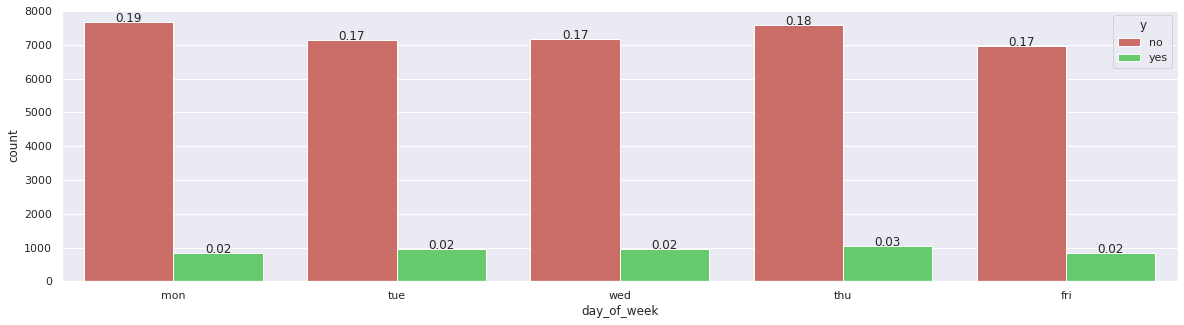

In [ ]:
# plotting how various days in data performed wrt Y
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="day_of_week", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

almost same number of call made each day and same respone for Yes and No for each day

In [ ]:
# calculating cross tab value
pd.crosstab(index=df['day_of_week'],columns=df['y'],margins=True,normalize=False)
day_of_week_ct=pd.crosstab(index=df['day_of_week'],columns=df['y'])

In [ ]:
# calculating chi square value
day_of_week_chi2=chi2_contingency(day_of_week_ct)

In [ ]:
day_of_week_chi2[:3]

(26.14493907587197, 2.9584820052785324e-05, 4)

Here though value of p is less than 0.05 chi square value is not high 

In [ ]:
# calculating cramer's v test
np.sqrt(day_of_week_chi2[0]/df.shape[0])

0.025194657858251365

Here value is very low and there is weak association between day of week and Y

In [ ]:
# getting count of values in poutcome
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

Looking at above value count most clients that were contacted are new 

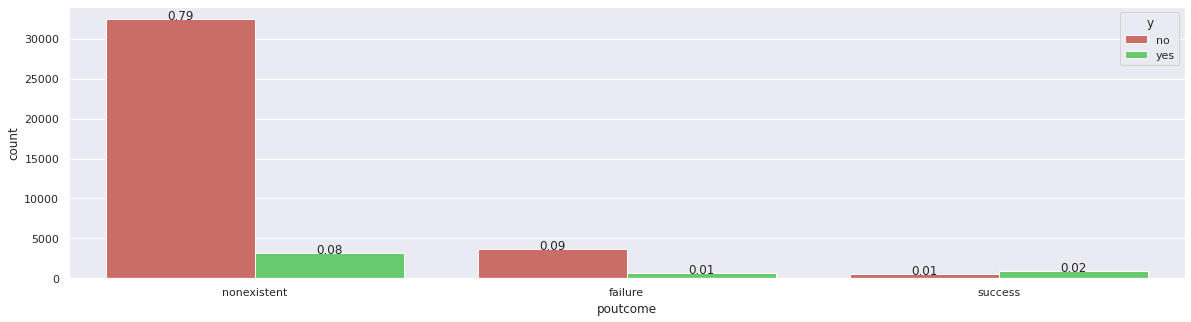

In [ ]:
#plotting how different values in poutcome performed wrt Y
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="poutcome", hue="y", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here clients who enrolled in previous market campaign has again subcribe to term deposit and hence target should the one who had already used the services for next campaign

In [ ]:
# calculating cross tab
pd.crosstab(index=df['poutcome'],columns=df['y'],margins=True,normalize=False)
poutcome_ct=pd.crosstab(index=df['poutcome'],columns=df['y'])

In [ ]:
# calculating chi square value
poutcome_chi2=chi2_contingency(poutcome_ct)

In [ ]:
poutcome_chi2[:3]

(4230.5237978319765, 0.0, 2)

Here the chi square value is highest amoung all the categorical variable and p value is also 0

In [ ]:
# calculating cramer's v test for poutcome variable
np.sqrt(poutcome_chi2[0]/df.shape[0])

0.32048796034156973

Here the value of test is highest amoung all the other variables and hence poutcome is most important variable that needs to be taken into consideration for next campaign

In [ ]:
# finding correlation between different continous variables
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y_num
age,1.000000,-0.000866,0.004594,0.018132,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.077984,0.030399
duration,-0.000866,1.000000,-0.071699,0.047853,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.050354,0.405274
campaign,0.004594,-0.071699,1.000000,-0.041984,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.147377,-0.066357
pdays,0.018132,0.047853,-0.041984,1.000000,0.485182,-0.218942,-0.041787,0.064192,-0.251822,-0.323122,-0.480276,0.267088
previous,0.024365,0.020640,-0.079141,0.485182,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,-0.542381,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,-0.218942,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.772820,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,-0.041787,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.394774,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,0.064192,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,-0.135932,0.054878
euribor3m,0.010767,-0.032897,0.135133,-0.251822,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.797714,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,-0.323122,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.899598,-0.354678


In [ ]:
# using spearman method to find correlaion between variables 
df.corr(method='spearman')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y_num
age,1.000000,-0.002123,0.005715,0.001268,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789,0.042857,-0.011861
duration,-0.002123,1.000000,-0.080953,0.083451,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225,-0.089561,0.348777
campaign,0.005715,-0.080953,1.000000,-0.054042,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264,0.221072,-0.063668
pdays,0.001268,0.083451,-0.054042,1.000000,0.506881,-0.226660,-0.056101,0.078027,-0.277867,-0.289949,-0.307112,0.322826
previous,-0.012643,0.042407,-0.087420,0.506881,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721,-0.401042,0.200914
emp.var.rate,0.045003,-0.069201,0.156360,-0.226660,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702,0.884427,-0.247480
cons.price.idx,0.044790,0.002854,0.096494,-0.056101,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738,0.495850,-0.122187
cons.conf.idx,0.114536,-0.008678,-0.001554,0.078027,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707,0.124365,0.041229
euribor3m,0.054391,-0.078346,0.140512,-0.277867,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857,0.863967,-0.266822
nr.employed,0.044789,-0.095225,0.144264,-0.289949,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000,0.897491,-0.283957


Here duration, pdays and previous has high correaltion with Y

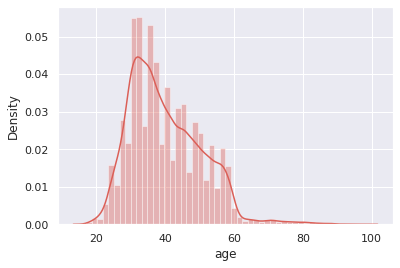

In [ ]:
# plotting histogram to see distribution of age variable
sns.distplot(df['age'],hist=True)

Many people with age range 30 -60 were contacted for this new campaign

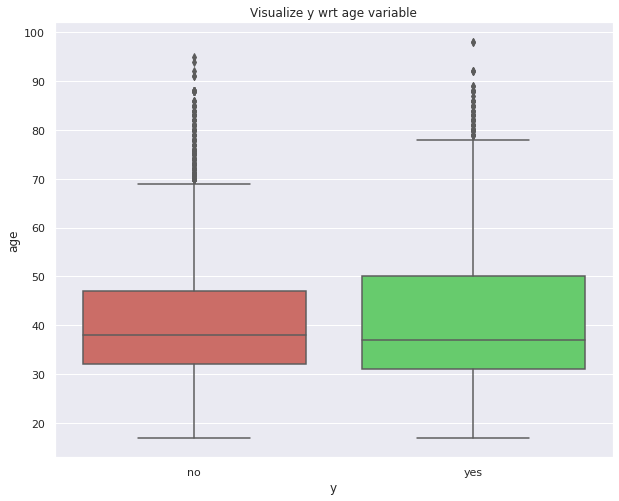

In [ ]:
# plotting box plot to see how age has performed wrt to Y
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="y", y="age", data=df)
ax.set_title("Visualize y wrt age variable")
plt.show()

Here we see that lot of client with above 80 have subscribe for the term deposit

In [ ]:
# seeing for correlation between age and duration
df[['age','duration']].corr('spearman')

,age,duration
age,1.000000,-0.002123
duration,-0.002123,1.000000


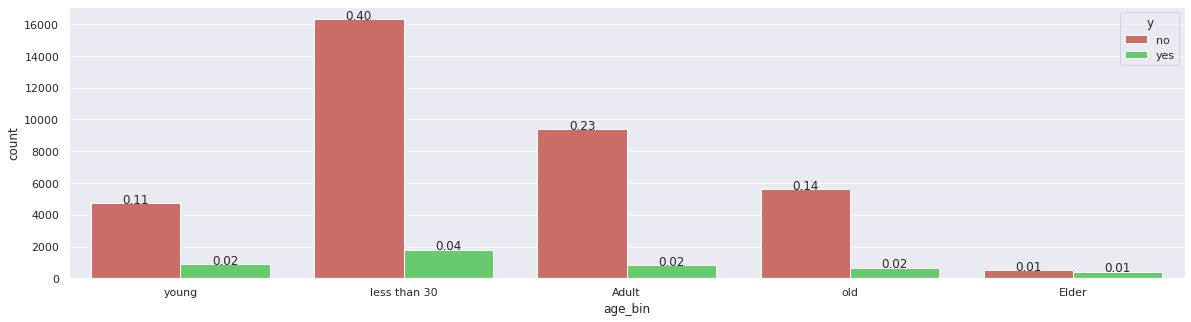

In [ ]:
#Binning age into different age group
df["age_bin"]=pd.cut(df.age,bins=[18,29,40,50,60,100],labels=['young','less than 30','Adult',"old",'Elder'])

sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="age_bin", hue="y", data=df)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

Here after binning age into different age group young and very old ppl most likely to say yes to term deposit

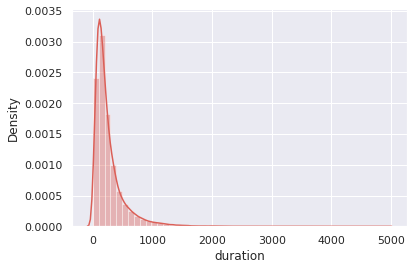

In [ ]:
sns.distplot(df['duration'],hist=True)

Here we see that the distribution for duration is right skewed and most of the values are less than 1000 

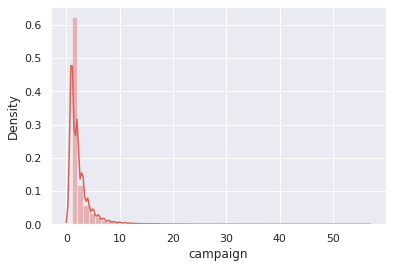

In [ ]:
sns.distplot(df['campaign'],hist=True)

Here campaign is right skewed and most of the values are less than 10

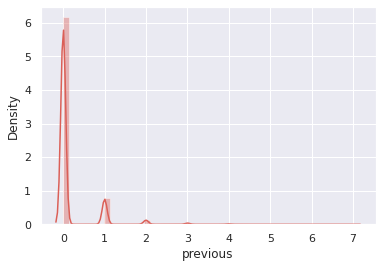

In [ ]:
sns.distplot(df['previous'],hist=True)

**Model** **Evalution**

In [ ]:
# Calculating log loss to evaluate model performance.It is used when probabilities are predicted for output variable
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
log_loss(df['y_num'], df['ModelPrediction'])

2.440811617052192

In [ ]:
# calculating True Positive
df.loc[(df['ModelPrediction'] > 0.50) & 
              (df['y'] == 'yes')].shape[0]

3960

In [ ]:
# Calculating False Negative (Type I error)
df.loc[(df['ModelPrediction'] < 0.50) & 
              (df['y'] == 'yes')].shape[0]

680

In [ ]:
# Calculating True Negative
df.loc[(df['ModelPrediction'] < 0.50) & 
              (df['y'] == 'no')].shape[0]

257

In [ ]:
# calculating False Positive(Type II error)
df.loc[(df['ModelPrediction'] > 0.50) & 
              (df['y'] == 'no')].shape[0]

36291

Confusion Matrix

[[3960   36291]
 [680     257]]

Accuracy =Tp+Tn/total
        = 3960+257/41188
        =0.10

Recall = Tp/ (Tp + Fn)
      = 3960/(3960+ 680)
      = 0.85

Here recall is not a good measure since our most of the label data are no and most of our output probability is more than 50 %

Precision=Tp/(tp + fp)
        = 3960/(3960 + 36291)
        = 0.09

Here our precision is very low as we are predicting a lot of clients as the one who will subscribe to term deposit but in actual only very less client have subscribe for term deposit




**Model Building**

Building simple model with all the variables

In [ ]:
# Independent Variables
X=df.iloc[:,:-3].values

In [ ]:
X

array([[56, 'housemaid', 'married', ..., 4.857, 5191.0, 0.932750381],
       [57, 'services', 'married', ..., 4.857, 5191.0, 0.953578747],
       [37, 'services', 'married', ..., 4.857, 5191.0, 0.945723775],
       ...,
       [56, 'retired', 'married', ..., 1.028, 4963.6, 0.5741020689999999],
       [44, 'technician', 'married', ..., 1.028, 4963.6, 0.615097583],
       [74, 'retired', 'married', ..., 1.028, 4963.6, 0.631596842]],
      dtype=object)

In [ ]:
#Dependent Varibale
y=df.iloc[:,-2].values

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Importing libraries for data preprocessing and encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(categories='auto'),[1,2,3,4,5,6,7,8,9,14])],remainder='passthrough')

In [ ]:
X=np.array(ct.fit_transform(X))

In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 4.857, 5191.0, 0.932750381],
       [0.0, 0.0, 0.0, ..., 4.857, 5191.0, 0.953578747],
       [0.0, 0.0, 0.0, ..., 4.857, 5191.0, 0.945723775],
       ...,
       [0.0, 0.0, 0.0, ..., 1.028, 4963.6, 0.5741020689999999],
       [0.0, 0.0, 0.0, ..., 1.028, 4963.6, 0.615097583],
       [0.0, 0.0, 0.0, ..., 1.028, 4963.6, 0.631596842]], dtype=object)

In [ ]:
# encoding dependent variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# building Random forest model
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predicting output
y_pred = classifier.predict(X_test)


In [ ]:
# displaying y_test and y_pred data
op=(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
op

array([[0, 0],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [ ]:
# calculating confusion metrics and accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[10640   304]
 [  780   633]]


0.9122764425022255

In [ ]:
#calculating log loss value
clf_probs = classifier.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.17639949075365272


In [ ]:
pip install scikit-plot

In [ ]:
#importing libraries to calculate metrics


from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# prinitng classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.68      0.45      0.54      1413

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
# Building Logistic Regression model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting Y
y_pred = classifier.predict(X_test)

In [ ]:
#calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10676   268]
 [  848   565]]


0.909686817188638

In [ ]:
#calculating classficiation report for LR model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10944
           1       0.68      0.40      0.50      1413

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
#Building XGBoost Model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#calculating confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10595   349]
 [  675   738]]


0.917131989965202

In [ ]:
#calculating classification report for XGB model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10944
           1       0.68      0.52      0.59      1413

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



XGBoost model has the highest accuracy and high precision and recall values and hence this is our best model when we include all the variables

Building Alternate model with selected variables

In [ ]:
df2=df

In [ ]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,y_num,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,0,old
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,0,old
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,0,less than 30
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,0,less than 30
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes,1,Elder
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no,0,Adult
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no,0,old
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes,1,Adult


In this model buidling process we are going to exclude variables like housing,loan since it did not have any association with Y and excluding duration since this value is calculated after the decision is made.

In [ ]:
df2.drop(df2.columns[[5,6,10,20,21,23]],axis=1,inplace=True)

In [ ]:
df2

,age,job,marital,education,default,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
0,56,housemaid,married,basic.4y,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,cellular,nov,fri,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
X2=df2.drop(['y_num'], axis=1)

In [ ]:
X2

,age,job,marital,education,default,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,cellular,nov,fri,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y2=df2['y_num']

In [ ]:
y2

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_num, Length: 41188, dtype: int64

In [ ]:
#splitting data into training and testing data
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [ ]:
#looking after all the categorical data
categorical = [col for col in X1_train.columns if X1_train[col].dtypes == 'O']
categorical

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
#looking for all the continous variable
numerical = [col for col in X1_train.columns if X1_train[col].dtypes != 'O']

numerical

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 4.0MB/s 


In [ ]:
#importing library
import category_encoders as ce

In [ ]:
#encoding all the categorical values
encoder=ce.OneHotEncoder(cols=['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome'])

In [ ]:
#applying categorical transformation to train and test data
X1_train=encoder.fit_transform(X1_train)
X1_test=encoder.transform(X1_test)

In [ ]:
X1_train

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,marital_1,marital_2,marital_3,marital_4,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,default_1,default_2,default_3,contact_1,contact_2,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31880,37,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-1.8,92.893,-46.2,1.327,5099.1
38177,54,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-3.4,92.431,-26.9,0.754,5017.5
2459,49,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1.1,93.994,-36.4,4.856,5191.0
756,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,1.1,93.994,-36.4,4.856,5191.0
11275,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,52,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,0,0,1.4,93.444,-36.1,4.965,5228.1
32103,56,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,-1.8,92.893,-46.2,1.313,5099.1
30403,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,-1.8,93.075,-47.1,1.365,5099.1
21243,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1.4,93.444,-36.1,4.963,5228.1


In [ ]:
#Building Random forest model
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rfc.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Prediction the output
y1_pred=rfc.predict(X1_test)

In [ ]:
#calculating accuracy of model
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y1_test, y1_pred)))

Model accuracy score with 100 decision-trees : 0.8911


In [ ]:
#checking for important feature or variables which are of high importance
feature_scores = pd.Series(rfc.feature_importances_, index=X1_train.columns).sort_values(ascending=False)

In [ ]:
feature_scores

age               0.183108
euribor3m         0.120383
campaign          0.099008
nr.employed       0.053047
emp.var.rate      0.036170
cons.conf.idx     0.025898
cons.price.idx    0.023893
pdays             0.023444
job_5             0.019169
marital_1         0.018338
education_4       0.018083
education_1       0.017655
marital_3         0.016697
poutcome_3        0.016569
day_of_week_3     0.015700
day_of_week_1     0.015506
day_of_week_4     0.015472
job_6             0.015390
day_of_week_2     0.015137
day_of_week_5     0.014765
previous          0.014076
job_2             0.013253
education_2       0.012997
education_3       0.012322
marital_2         0.011570
contact_1         0.010675
job_3             0.010357
job_1             0.010025
education_5       0.010022
default_2         0.009792
poutcome_1        0.009756
default_1         0.009007
contact_2         0.008430
poutcome_2        0.008215
education_7       0.007583
job_7             0.007486
education_6       0.007196
j

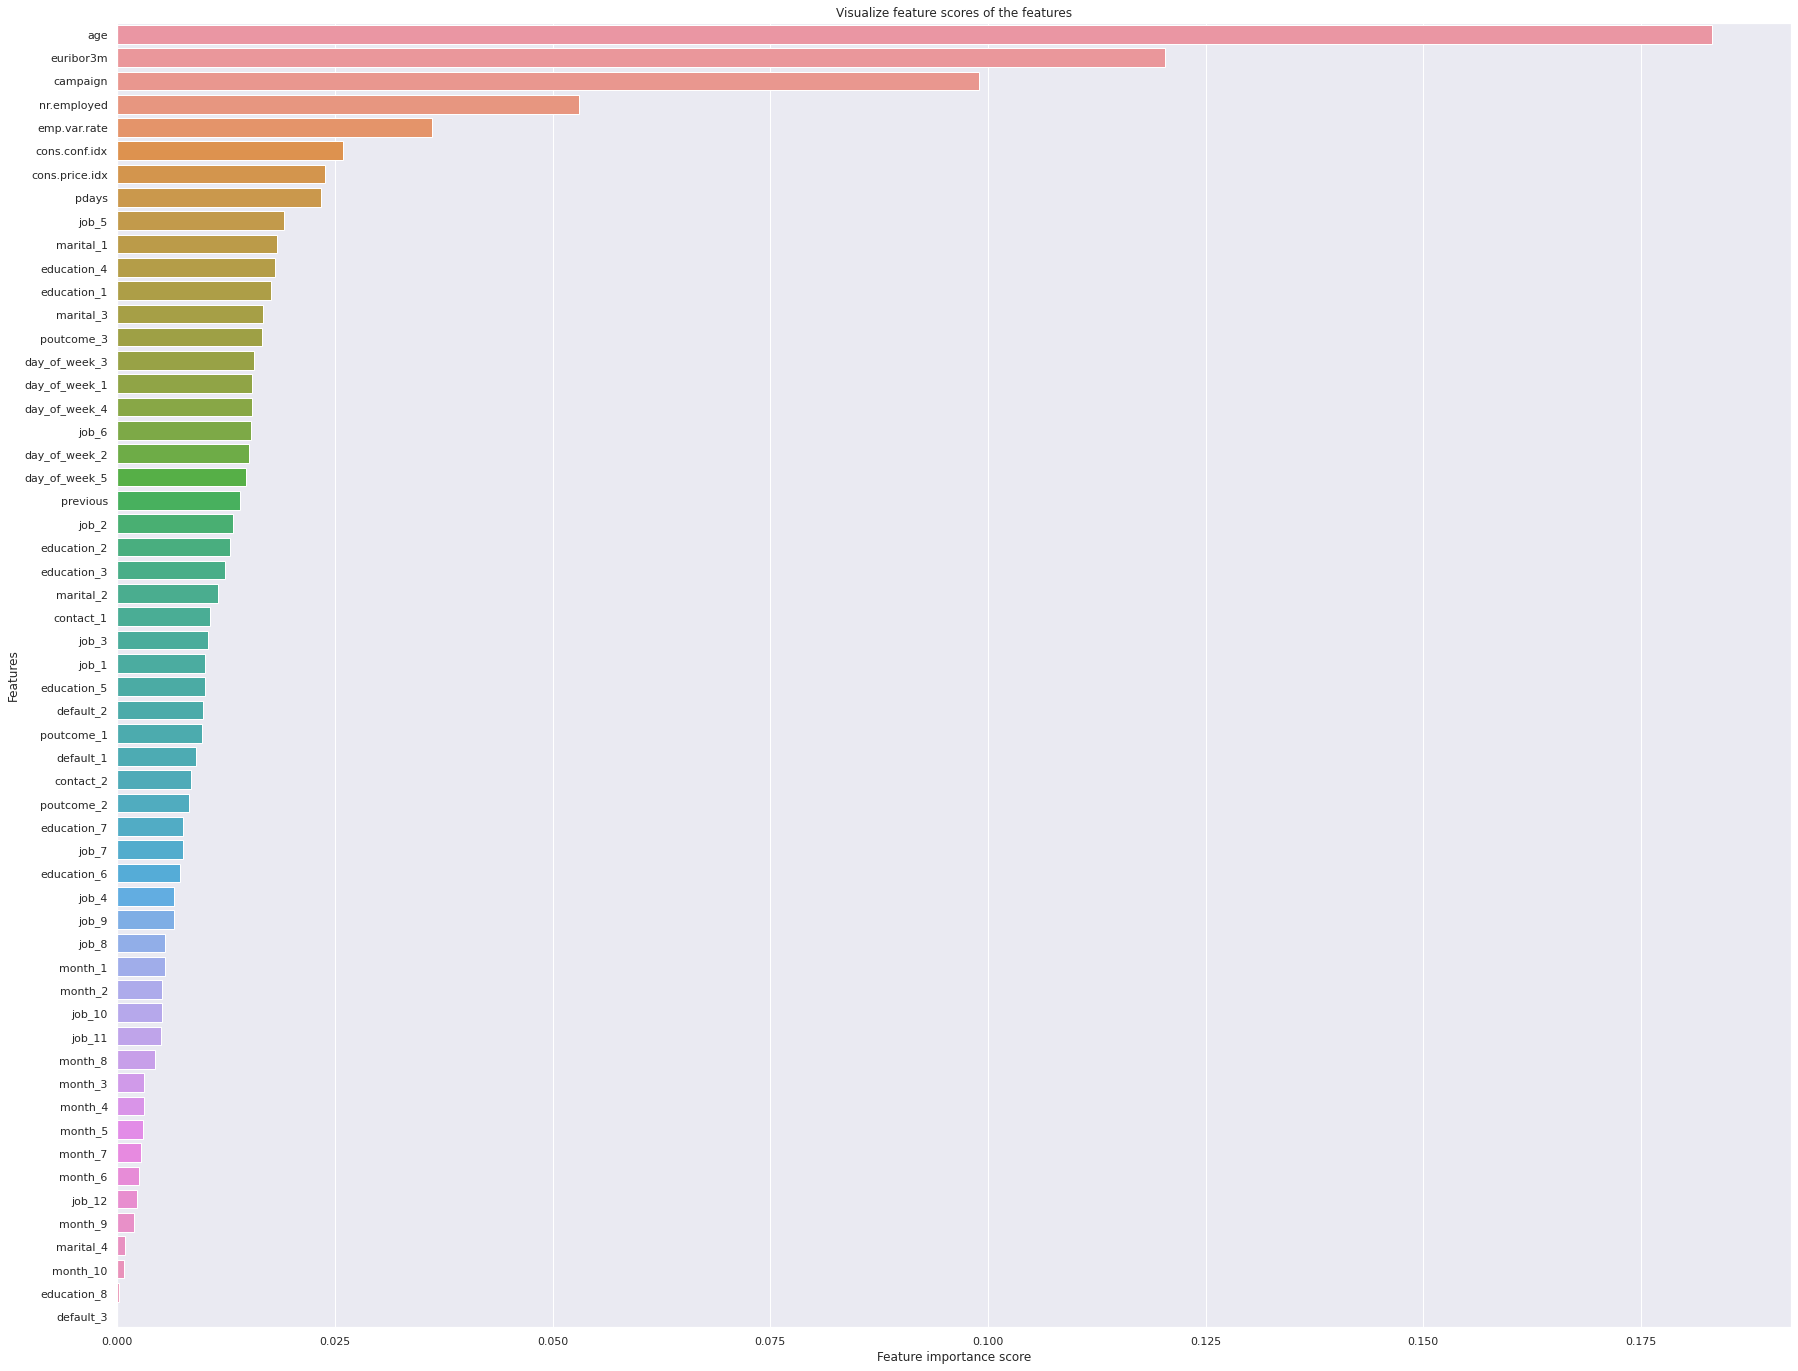

In [471]:
#plotting the important features
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df2)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
#calculating precision and recall value
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10969
           1       0.53      0.30      0.39      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.64      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [ ]:
#calculating log loss value
clf_probs = rfc.predict_proba(X1_test)
score = log_loss(y1_test, clf_probs)
print(score)

0.5562036269145038


In [ ]:
#building Logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = classifier.predict(X1_test)

In [ ]:
#calculating confusion matrix and accuracy 
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
accuracy_score(y1_test, y1_pred)

[[10860   109]
 [ 1166   222]]


0.8968196164117505

In [488]:
#Building XGBoost model
from xgboost import XGBClassifier
clc = XGBClassifier()
clc.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [489]:
y1_pred = clc.predict(X1_test)

In [490]:
# getting all the important variable weights sorted in high importance order which are very helpful in predicting output variable
feature_scores = pd.Series(clc.feature_importances_, index=X1_train.columns).sort_values(ascending=False)

In [491]:
feature_scores

nr.employed       0.399096
emp.var.rate      0.102818
poutcome_3        0.088071
pdays             0.054834
cons.conf.idx     0.030890
month_2           0.027523
default_1         0.027169
month_8           0.025752
month_1           0.017587
contact_1         0.014849
euribor3m         0.013145
poutcome_2        0.012924
day_of_week_5     0.012332
job_2             0.011736
cons.price.idx    0.010389
job_11            0.010019
month_4           0.009444
day_of_week_2     0.007937
education_1       0.007788
age               0.007365
job_12            0.007255
marital_4         0.007168
day_of_week_4     0.006866
campaign          0.006684
job_7             0.006563
job_5             0.005642
education_5       0.004919
default_2         0.004618
month_5           0.004481
month_7           0.004405
job_3             0.004404
day_of_week_3     0.004388
job_6             0.004273
job_10            0.003847
marital_3         0.003751
month_10          0.003518
month_6           0.003502
m

In [ ]:
#calculating confusion matrix and accuracy value
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
accuracy_score(y1_test, y1_pred)

[[10821   148]
 [ 1092   296]]


0.8996520190984867

In [ ]:
#calculating claasification report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.67      0.21      0.32      1388

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357



Here again our XGBoost model has the highest accuracy and preicsion and recall value and thus we should select this model for our future campaign
